### Import

In [62]:
import networkx as nx
from node2vec import Node2Vec
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, accuracy_score
import seaborn as sns

In [2]:
months = ['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30']
graphs = []

for month in months:
    with open(f'../data/graphs/graph_{month}.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(f'For {month}: {g.edges}')

For 2015-01-31: [('AFG', 'PAK'), ('AFG', 'USA'), ('PAK', 'CHN'), ('PAK', 'MEX'), ('PAK', 'SAU'), ('PAK', 'USA'), ('USA', 'AFR'), ('USA', 'AUS'), ('USA', 'BGD'), ('USA', 'BLR'), ('USA', 'BLZ'), ('USA', 'CAN'), ('USA', 'CHE'), ('USA', 'CHL'), ('USA', 'CHN'), ('USA', 'COD'), ('USA', 'COK'), ('USA', 'COL'), ('USA', 'CUB'), ('USA', 'DEU'), ('USA', 'EGY'), ('USA', 'ESP'), ('USA', 'EUR'), ('USA', 'FRA'), ('USA', 'GBR'), ('USA', 'GRC'), ('USA', 'HKG'), ('USA', 'IRN'), ('USA', 'ISR'), ('USA', 'JOR'), ('USA', 'JPN'), ('USA', 'KEN'), ('USA', 'KOR'), ('USA', 'LCA'), ('USA', 'MEX'), ('USA', 'MYS'), ('USA', 'NIC'), ('USA', 'NMR'), ('USA', 'PAN'), ('USA', 'PER'), ('USA', 'PHL'), ('USA', 'RUS'), ('USA', 'SAU'), ('USA', 'SEA'), ('USA', 'SYR'), ('USA', 'TUR'), ('USA', 'UGA'), ('USA', 'YEM'), ('AFR', 'BDI'), ('AFR', 'DJI'), ('AFR', 'NGA'), ('AFR', 'SDN'), ('AFR', 'SOM'), ('AFR', 'ZAF'), ('SDN', 'KOR'), ('SDN', 'LBY'), ('SOM', 'TUR'), ('ZAF', 'CUB'), ('ZAF', 'GBR'), ('ARE', 'AUS'), ('ARE', 'BHR'), ('ARM',

In [3]:
graphs

In [4]:
january_node2vec = Node2Vec(graphs[0], dimensions=64, walk_length=30, num_walks=100, workers=4)
january_model = january_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]

In [5]:
february_node2vec = Node2Vec(graphs[1], dimensions=64, walk_length=30, num_walks=100, workers=4)
february_model = february_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/194 [00:00<?, ?it/s]

In [6]:
march_node2vec = Node2Vec(graphs[2], dimensions=64, walk_length=30, num_walks=100, workers=4)
march_model = march_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/213 [00:00<?, ?it/s]

In [7]:
april_node2vec = Node2Vec(graphs[3], dimensions=64, walk_length=30, num_walks=100, workers=4)
april_model = april_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/211 [00:00<?, ?it/s]

In [8]:
print(len(graphs[0].nodes) == len(graphs[1].nodes) == len(graphs[2].nodes) == len(graphs[3].nodes))

False


In [9]:
ser1 = pd.Series([n for n in graphs[0].nodes])
ser2 = pd.Series([n for n in graphs[1].nodes])
ser3 = pd.Series([n for n in graphs[2].nodes])
ser4 = pd.Series([n for n in graphs[3].nodes])
intersection_set = set(ser1).intersection(set(ser2)).intersection(set(ser3)).intersection(set(ser4))

In [10]:
intersection_set

{'AFG',
 'AFR',
 'ARE',
 'ARM',
 'AUS',
 'BDI',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BLR',
 'BLZ',
 'BRA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'CUB',
 'DEU',
 'DJI',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUR',
 'FIN',
 'FJI',
 'FRA',
 'GBR',
 'GHA',
 'GMB',
 'GRC',
 'HKG',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISR',
 'ITA',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'LBN',
 'LBY',
 'LCA',
 'LKA',
 'LSO',
 'LTU',
 'LVA',
 'MDA',
 'MDV',
 'MEX',
 'MLI',
 'MMR',
 'MYS',
 'NER',
 'NGA',
 'NIC',
 'NMR',
 'NZL',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'POL',
 'PRK',
 'PSE',
 'QAT',
 'RUS',
 'SAF',
 'SAU',
 'SDN',
 'SEA',
 'SGP',
 'SOM',
 'SWE',
 'SYR',
 'THA',
 'TUR',
 'TWN',
 'TZA',
 'UGA',
 'UKR',
 'USA',
 'VEN',
 'WST',
 'YEM',
 'ZAF'}

In [11]:
avg_vectors = dict()
for node in intersection_set:
    avg_vector = []
    for i in range(64):
        avg_vector.append((january_model.wv[node][i] + february_model.wv[node][i] + march_model.wv[node][i] + april_model.wv[node][i]) / 4)
    avg_vectors[node] = avg_vector

In [12]:
graphs[0].nodes['USA']


{}

In [13]:
january_model.wv['USA']

array([-0.17786239, -0.23210531,  0.24144918, -0.005058  , -0.38556114,
       -0.31357157,  0.23159716, -0.26815334, -0.15651698,  0.20272824,
        0.35885283,  0.03920168, -0.00078217, -0.18446401, -0.22633517,
       -0.05538495, -0.24950905,  0.1746254 ,  0.29500455, -0.1188528 ,
       -0.05916205,  0.19185543,  0.24375181,  0.08930945,  0.11982228,
        0.23804392, -0.21387509,  0.12188563,  0.15897232,  0.01357983,
       -0.08783468, -0.01298252, -0.27796066, -0.19696309, -0.03591888,
       -0.20589244,  0.08924276,  0.03752594,  0.39123517, -0.0840655 ,
        0.17346275,  0.09310508,  0.21750958, -0.2561673 ,  0.23924424,
        0.23152603,  0.17154112, -0.21376878, -0.03356754, -0.03907065,
        0.31565905,  0.11160725, -0.02454541, -0.08594687,  0.02597528,
       -0.01783363,  0.12446745,  0.03726168, -0.09461989,  0.22311169,
        0.33440933, -0.43407503, -0.13390303,  0.18360743], dtype=float32)

In [14]:
len(avg_vectors['USA'])

64

### Scalar product of two vectors for link prediction

In [15]:
dot_products = dict()
for node1 in avg_vectors:
    for node2 in avg_vectors:
        if node1 != node2:
            vector1 = np.array(avg_vectors[node1])
            vector2 = np.array(avg_vectors[node2])
            n_sorted = sorted([node1, node2])
            dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = np.dot(vector1, vector2)

In [16]:
dot_products

{'BHR-SAF': 1.1084462482447928,
 'IDN-SAF': 0.5749772248889944,
 'KEN-SAF': 0.4689909629807783,
 'MYS-SAF': 0.4205999890970772,
 'LKA-SAF': 0.6392284829655218,
 'IND-SAF': 1.5505019421317872,
 'ECU-SAF': 0.8361246469968779,
 'SAF-UGA': 0.6870515309409593,
 'DJI-SAF': 1.1257951545388276,
 'ARM-SAF': 1.1654805301223887,
 'BGD-SAF': 1.407890523730956,
 'DEU-SAF': 0.6047610361451615,
 'PRK-SAF': 0.3194279532771629,
 'KAZ-SAF': 0.6447948389416212,
 'NGA-SAF': 1.1229491013204838,
 'SAF-THA': 0.4285052293660446,
 'BDI-SAF': 0.9435488794394803,
 'FRA-SAF': 0.49537432094603573,
 'LVA-SAF': 1.7161517149897283,
 'ITA-SAF': 0.6186298054200791,
 'MLI-SAF': 1.6827752279020258,
 'HUN-SAF': 0.6577573607623133,
 'RUS-SAF': 0.5372145727967907,
 'EUR-SAF': 0.5112643217991956,
 'CAN-SAF': 0.7473265968156285,
 'CIV-SAF': 1.2266109492256116,
 'ISR-SAF': 0.7239592508955479,
 'LTU-SAF': 0.7339037580063705,
 'COG-SAF': 0.7978755420235433,
 'JOR-SAF': 0.6720648442601549,
 'PAN-SAF': 0.44429131668732724,
 'NZL-S

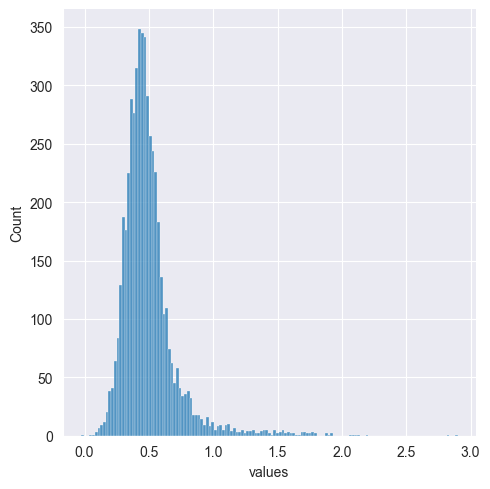

In [63]:
sns.displot(pd.DataFrame({'values':dot_products.values()}), x='values')

### Testing with different values of threshold

In [46]:
with open(f'../data/graphs/graph_2015-05-31.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(g.edges(data=True))

[('ABW', 'NLD', {'weight': 0.32994957983193246}), ('ABW', 'USA', {'weight': 5.517460317460318}), ('NLD', 'AFG', {'weight': -3.426760563380282}), ('NLD', 'ARM', {'weight': 1.9140045248868778}), ('NLD', 'AUS', {'weight': 2.1999999999999993}), ('NLD', 'BEL', {'weight': 2.121474059795504}), ('NLD', 'BEN', {'weight': 1.7709090909090919}), ('NLD', 'BGR', {'weight': 2.242058823529412}), ('NLD', 'CAF', {'weight': 4.732908704883228}), ('NLD', 'CAN', {'weight': 3.1796312031433214}), ('NLD', 'CHE', {'weight': 2.196134289634012}), ('NLD', 'CHN', {'weight': -8.409126984126983}), ('NLD', 'COL', {'weight': 3.9242182070882556}), ('NLD', 'CUB', {'weight': 2.2235265290926085}), ('NLD', 'DEU', {'weight': 2.231082544988315}), ('NLD', 'DNK', {'weight': 2.5728605415592574}), ('NLD', 'ESP', {'weight': 2.176562907709591}), ('NLD', 'EUR', {'weight': 1.6258020833405673}), ('NLD', 'FIN', {'weight': 4.068533748136987}), ('NLD', 'FRA', {'weight': 2.596123113617373}), ('NLD', 'GBR', {'weight': 2.1992920760201375}),

In [92]:
actual_and_predicted_values = dict()
for edge in g.edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in dot_products:
        threshold = 0.1
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] >= 0 else 0, 1 if dot_products[e] > threshold else 0)

In [93]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]
recall = recall_score(actual, predicted)
acc = accuracy_score(actual, predicted)
print('Recall:', recall, 'Accuracy:', acc)

Recall: 1.0 Accuracy: 0.7256637168141593
